In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

image_size = (120, 160)
batch_size =64


train_dir = "/Users/zuzannaszubartowska/code/crop_colour/data/train"
test_dir = "/Users/zuzannaszubartowska/code/crop_colour/data/test"
valid_dir = "/Users/zuzannaszubartowska/code/crop_colour/data/validation"


num_classes = 6

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(120, 160),
    batch_size=batch_size,
    class_mode='categorical',
    classes=['blackempty', 'blackking', 'blackpawn','whiteempty', 'whiteking','whitepawn'])


validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(120, 160),
    batch_size=batch_size,
    class_mode='categorical',classes=['blackempty', 'blackking', 'blackpawn','whiteempty', 'whiteking','whitepawn'])


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(120, 160),
    batch_size=batch_size,
    class_mode='categorical', classes=['blackempty', 'blackking', 'blackpawn','whiteempty', 'whiteking','whitepawn'])


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (2, 2), activation='relu', kernel_regularizer=l2(0.001),input_shape=(120, 160,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (2, 2), activation='relu',kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (2, 2), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

Found 1840 images belonging to 6 classes.
Found 540 images belonging to 6 classes.
Found 1530 images belonging to 6 classes.


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 119, 159, 64)      832       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 59, 79, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 58, 78, 128)       32896     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 29, 39, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 38, 256)       131328    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 19, 256)     

In [17]:
from keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(
    monitor='val_accuracy', 
    min_delta=0.001, 
    patience=4, 
    verbose=1, 
    mode='auto',
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size,
    callbacks=[earlystop_callback]
)


Epoch 1/15
28/28 [==============================] - 37s 1s/step - loss: 1.7893 - accuracy: 0.6346 - val_loss: 0.8873 - val_accuracy: 0.7988
Epoch 2/15
28/28 [==============================] - 38s 1s/step - loss: 0.7486 - accuracy: 0.8559 - val_loss: 0.5531 - val_accuracy: 0.8867
Epoch 3/15
28/28 [==============================] - 39s 1s/step - loss: 0.5003 - accuracy: 0.9229 - val_loss: 0.3856 - val_accuracy: 0.9629
Epoch 4/15
28/28 [==============================] - 39s 1s/step - loss: 0.3585 - accuracy: 0.9572 - val_loss: 0.3389 - val_accuracy: 0.9590
Epoch 5/15
28/28 [==============================] - 39s 1s/step - loss: 0.3500 - accuracy: 0.9488 - val_loss: 0.3104 - val_accuracy: 0.9746
Epoch 6/15
28/28 [==============================] - 40s 1s/step - loss: 0.2750 - accuracy: 0.9690 - val_loss: 0.3398 - val_accuracy: 0.9531
Epoch 7/15
28/28 [==============================] - 40s 1s/step - loss: 0.3328 - accuracy: 0.9505 - val_loss: 0.2980 - val_accuracy: 0.9707
Epoch 8/15
28/28 [==

In [5]:
test_loss, test_acc = model.evaluate(test_generator)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/traitlets/config/application.py", line 978, in launch_instance
      app.start()
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/06/83g1gzl96nj2_cpq0t67k67h0000gn/T/ipykernel_78792/1196842460.py", line 1, in <module>
      test_loss, test_acc = model.evaluate(test_generator)
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1947, in evaluate
      tmp_logs = self.test_function(iterator)
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1727, in test_function
      return step_function(self, iterator)
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1713, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1701, in run_step
      outputs = model.test_step(data)
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1667, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/losses.py", line 1990, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "/Users/zuzannaszubartowska/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/backend.py", line 5535, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[128,14] labels_size=[128,6]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_test_function_1475]

In [346]:
model.save('/Users/zuzannaszubartowska/code/zuzannaszu/new_save2/chessmodel.h5')

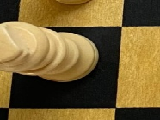

In [324]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_path = '/Users/zuzannaszubartowska/code/crop_colour/puzzle/more_kings/board56-crop49.jpeg'
img = load_img(img_path, target_size=(120, 160))

img_array = img_to_array(img)

img

In [325]:
import numpy as np

img_array /= 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)

predicted_class_index = np.argmax(predictions)

class_labels = list(train_generator.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index]


print("Predicted class label: ", predicted_class_label)

1/1 [==============================] - 0s 26ms/step
Predicted class label:  whiteking


In [264]:
predictions

array([[1.5255431e-05, 3.6176771e-02, 9.6375483e-01, 1.9981489e-07,
        6.7968949e-06, 4.6097874e-05]], dtype=float32)

In [347]:
output = {}
for idx, p_class in enumerate(predicted_class):
    if p_class != 'whiteempty' and p_class != 'blackempty':
        if idx in list(range(1,9)):
            letter = 'A'
        elif idx in list(range(9,17)):
            letter = 'B'    
        elif idx in list(range(17,25)):
            letter = 'C' 
        elif idx in list(range(25,33)):
            letter = 'D' 
        elif idx in list(range(33,41)):
            letter = 'E' 
        elif idx in list(range(41,49)):
            letter = 'F' 
        elif idx in list(range(49,57)):
            letter = 'G' 
        elif idx in list(range(57,65)):
            letter = 'H'
        digit = idx % 8
        coordinate = letter + str(digit + 1)
        if p_class == 'blackking':
            output[coordinate] = 'Black_k'
        elif p_class == 'blackqueen':
            output[coordinate] = 'Black_q'
        elif p_class == 'blackbishop':
            output[coordinate] = 'Black_b'
        elif p_class == 'blackknight':
            output[coordinate] = 'Black_kn'
        elif p_class == 'blackrook':
            output[coordinate] = 'Black_r'
        elif p_class == 'blackpawn':
            output[coordinate] = 'Black_p'
        elif p_class == 'whiteking':
            output[coordinate] = 'White_k'
        elif p_class == 'whitequeen':
            output[coordinate] = 'White_q'
        elif p_class == 'whitebishop':
            output[coordinate] = 'White_b'
        elif p_class == 'whiteknight':
            output[coordinate] = 'White_kn'
        elif p_class == 'whiterook':
            output[coordinate] = 'White_r'
        elif p_class == 'whitepawn':
            output[coordinate] = 'White_p'


In [340]:
predicted_class

['blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'whiteempty',
 'blackking',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'blackpawn',
 'blackpawn',
 'blackempty',
 'whitepawn',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'whiteempty',
 'whiteking',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'whitepawn',
 'whiteempty',
 'whitepawn',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty']

In [348]:
output

{'D1': 'Black_k',
 'E6': 'Black_p',
 'E7': 'Black_p',
 'E1': 'White_p',
 'F1': 'White_k',
 'G5': 'White_p',
 'G7': 'White_p'}

In [336]:
images

['blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'whiteempty',
 'blackking',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'blackpawn',
 'blackpawn',
 'blackempty',
 'whitepawn',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'whiteempty',
 'whiteking',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'whitepawn',
 'whiteempty',
 'whitepawn',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty',
 'blackempty',
 'whiteempty']